Sales of summer clothes in E-commerce Wish11

In [1]:
import numpy as np
import pandas as pd

import os

In [2]:
pro=pd.read_csv("D:/Medium/Sales of summer clothes in E-commerce Wish/summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
print(pro.head(5))
print('''data's information''',pro.info())

                                               title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4  Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45        

first, i check number of null and delete columns which is 70% percentage of null. because i thint that it's too much to replace

In [4]:
check=round(pro.isnull().sum()/pro.shape[0],1)
print(check)

title                           0.0
title_orig                      0.0
price                           0.0
retail_price                    0.0
currency_buyer                  0.0
units_sold                      0.0
uses_ad_boosts                  0.0
rating                          0.0
rating_count                    0.0
rating_five_count               0.0
rating_four_count               0.0
rating_three_count              0.0
rating_two_count                0.0
rating_one_count                0.0
badges_count                    0.0
badge_local_product             0.0
badge_product_quality           0.0
badge_fast_shipping             0.0
tags                            0.0
product_color                   0.0
product_variation_size_id       0.0
product_variation_inventory     0.0
shipping_option_name            0.0
shipping_option_price           0.0
shipping_is_express             0.0
countries_shipped_to            0.0
inventory_total                 0.0
has_urgency_banner          

In [5]:
drop_list=[x for x in check.index if check[x] == 1]
pro=pro.drop(drop_list,axis=1)

and number of each column's unique is 1
it says to me that it's the same condition. so it is not imfortant

In [6]:
column=[]
for i in pro.columns:
    print(i,len(pro[i].unique()))
    if len(pro[i].unique()) ==1:
        column.append(i)

title 1201
title_orig 1203
price 127
retail_price 104
currency_buyer 1
units_sold 15
uses_ad_boosts 2
rating 192
rating_count 761
rating_five_count 606
rating_four_count 441
rating_three_count 385
rating_two_count 263
rating_one_count 331
badges_count 4
badge_local_product 2
badge_product_quality 2
badge_fast_shipping 2
tags 1230
product_color 102
product_variation_size_id 107
product_variation_inventory 48
shipping_option_name 15
shipping_option_price 8
shipping_is_express 2
countries_shipped_to 94
inventory_total 10
has_urgency_banner 2
urgency_text 3
origin_country 7
merchant_title 958
merchant_name 958
merchant_info_subtitle 1059
merchant_rating_count 917
merchant_rating 952
merchant_id 958
merchant_has_profile_picture 2
merchant_profile_picture 126
product_url 1341
product_picture 1341
product_id 1341
theme 1
crawl_month 1


In [7]:
print(pro[column])

     currency_buyer   theme crawl_month
0               EUR  summer     2020-08
1               EUR  summer     2020-08
2               EUR  summer     2020-08
3               EUR  summer     2020-08
4               EUR  summer     2020-08
...             ...     ...         ...
1568            EUR  summer     2020-08
1569            EUR  summer     2020-08
1570            EUR  summer     2020-08
1571            EUR  summer     2020-08
1572            EUR  summer     2020-08

[1573 rows x 3 columns]


before delete above column, check relation column for example, When you buy clothes at an online shopping mall, there are two possible cases: a seasonal sale where you buy clothes for the season or when you buy winter clothes for the summer. There may be people who buy goods.

In [8]:
print(pro['theme'].unique())
pro['tags']=pro['tags'].str.contains('summer')
pro=pro.drop(column,axis=1)

['summer']


we distinguish each column' dytype, and if categorical column'null replace 'unknown'

In [9]:
C=(pro.dtypes=='object')
Cate=list(C[C].index)
Integer=(pro.dtypes=='int64')
Float=(pro.dtypes=='float64')
Numer=list(Integer[Integer].index)+list(Float[Float].index)
pro[Cate]=pro[Cate].fillna('unknow')

Category data contain the same meaning, which standardizes it.

In [10]:
def size(x):
    x=x.str.lower().tolist()
    siz=['xxs','xs','s','m','l','xl','xxl','xxxl','xxxxl','xxxxxl','2xl','3xl','4xl','5xl']
    stand_siz=['xxs','xs','s','m','l','xl','xxl','xxxl','xxxxl','xxxxxl']
    for i in range(len(siz)):
        for j in range(len(x)):
            if x[j] == siz[i]:
                x[j]=siz[i]

    
    for i in range(len(x)):
        if x[i] in stand_siz:
            pass
        elif x[i]=='2xl':
            x[i]='xxl'
        elif x[i]=='3xl':
            x[i]='xxxl'
        elif x[i]=='4xl':
            x[i]='xxxxl'
        elif x[i]=='5xl':
            x[i]='xxxxxl'
        else:
            x[i]='other'
    return x

Color_map  = {'NaN':'Unknown','Black':'black','black':'black','White':'white','white':'white','navyblue':'blue',
             'lightblue':'blue','blue':'blue','skyblue':'blue','darkblue':'blue','navy':'blue','winered':'red',
             'red':'red','rosered':'red','rose':'red','orange-red':'red','lightpink':'pink','pink':'pink',
              'armygreen':'green','green':'green','khaki':'green','lightgreen':'green','fluorescentgreen':'green',
             'gray':'grey','grey':'grey','brown':'brown','coffee':'brown','yellow':'yellow','purple':'purple',
             'orange':'orange','beige':'beige'}

In [11]:
pro['product_variation_size_id']=size(pro['product_variation_size_id'])
pro['product_color']=pro['product_color'].map(Color_map)

In [12]:
print(pro['product_variation_size_id'].unique())
print(pro['product_color'].unique())

['m' 'xs' 's' 'other' 'xxs' 'l' 'xxl' 'xxxxxl' 'xxxl' 'xl' 'xxxxl']
['white' 'green' nan 'black' 'yellow' 'blue' 'beige' 'grey' 'orange' 'red'
 'pink' 'purple' 'brown']


We're going to divide it into categories, but at least if the data in each column exceeds three-thirds, it's meaningless because it's already divided in the index. It also provides unnecessary size for one-hot encoding of data.

In [13]:
def check_unique(data):
    column=data.columns
    dic={}
    for i in column:
        unique=len(data[i].unique())
        if unique>(data.shape[0])/3:
            dic[i]=unique
            
    return dic

In [14]:
pro=pro.drop(list(check_unique(pro[Cate])),axis=1)
pro['gap_price']=(pro['price']-pro['retail_price'])/pro['price']
pro=pro.drop(['price','retail_price'],axis=1)

gap_price means between price and retail price percentage. The reason I did this was to imply the meaning of the two columns by grouping them into one column.

In [15]:
pro=pro.drop(['rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count'],axis=1)

The reason for erasing the above column is that information is already in the column called Rating, and the information that comes directly to consumers in selecting the product is the average score and the number of reviews. Some consumers look closely, but due to the nature of the product, there are many types and only information was selected intuitively in the purchase decision.

In [16]:
C=(pro.dtypes=='object')
Cate=list(C[C].index)
Integer=(pro.dtypes=='int64')
Float=(pro.dtypes=='float64')
Numer=list(Integer[Integer].index)+list(Float[Float].index)

percentage25=pro.describe().loc['25%','units_sold']
percentage50=pro.describe().loc['50%','units_sold']
percentage75=pro.describe().loc['75%','units_sold']
for i in range(pro.shape[0]):
    if pro.iloc[i,0]<percentage25:
        pro.iloc[i,0]=0
    elif (pro.iloc[i,0]>=percentage25) and (pro.iloc[i,0]<=percentage75):
        pro.iloc[i,0]=1
    else:
        pro.iloc[i,0]=2

In [17]:
print(pro[Numer].describe())

        units_sold  uses_ad_boosts  rating_count  badges_count  \
count  1573.000000     1573.000000   1573.000000   1573.000000   
mean      1.104259        0.432931    889.659250      0.105531   
std       0.519898        0.495639   1983.928834      0.340709   
min       0.000000        0.000000      0.000000      0.000000   
25%       1.000000        0.000000     24.000000      0.000000   
50%       1.000000        0.000000    150.000000      0.000000   
75%       1.000000        1.000000    855.000000      0.000000   
max       2.000000        1.000000  20744.000000      3.000000   

       badge_local_product  badge_product_quality  badge_fast_shipping  \
count          1573.000000            1573.000000          1573.000000   
mean              0.018436               0.074380             0.012715   
std               0.134565               0.262472             0.112075   
min               0.000000               0.000000             0.000000   
25%               0.000000         

i use box-plot concept. first, i say that this problem is classfication. so The reason why it sold so well is 2 as usual, 1 as usual, and if it doesn't sell abnormally, it's divided by 0.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
numner_columns=[x for x in pro[Numer].columns if x != 'units_sold']
cate_column=list(pro[Cate].columns)
markers = {0: "c",1: "b",2:"a"}

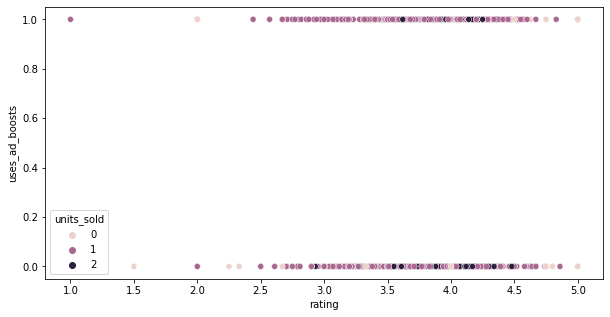

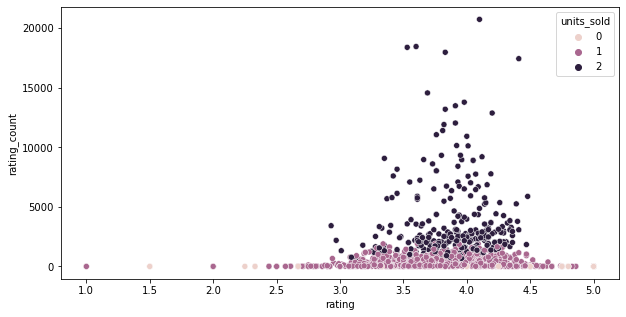

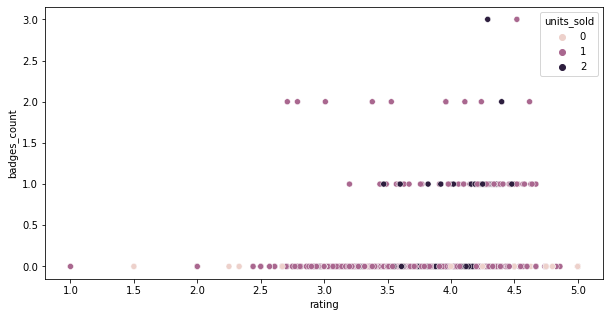

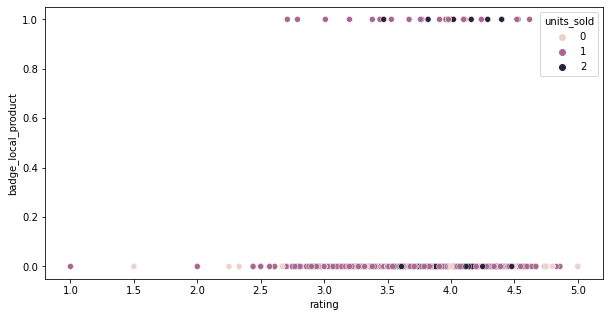

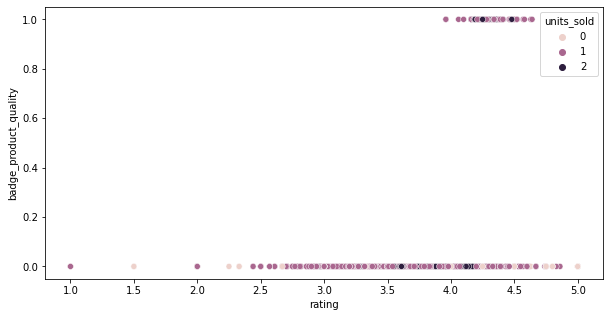

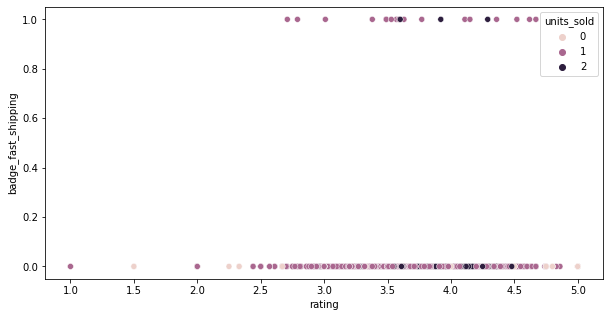

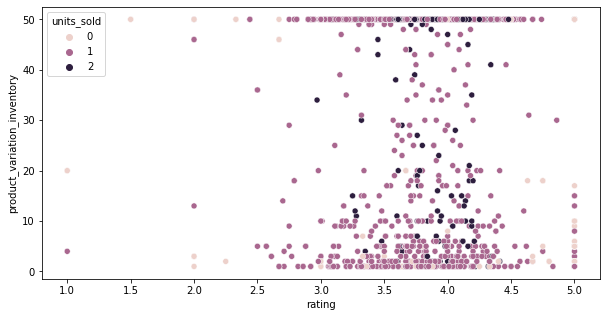

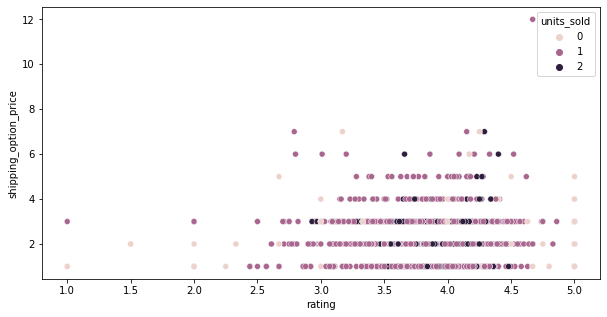

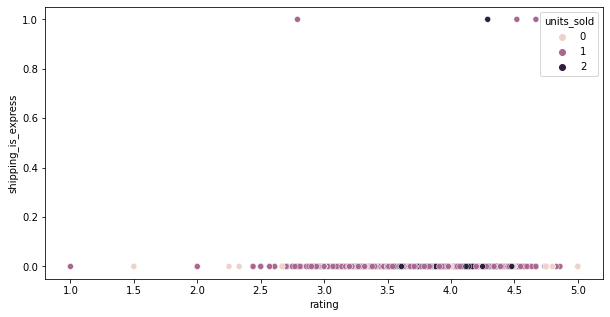

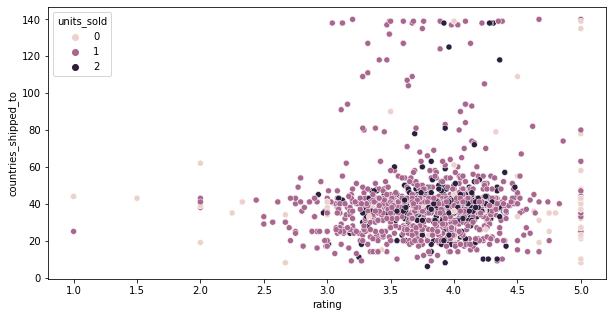

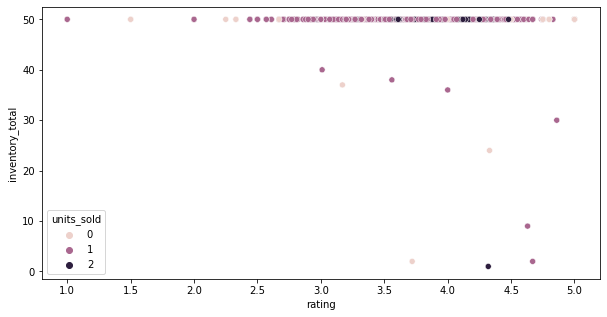

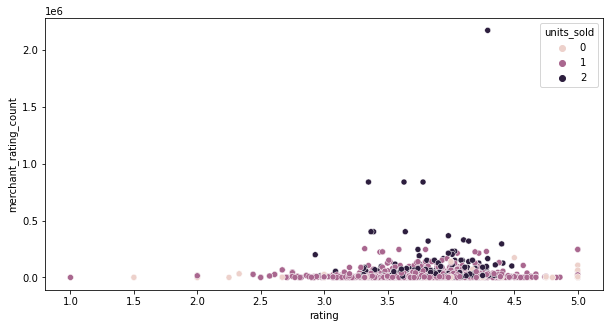

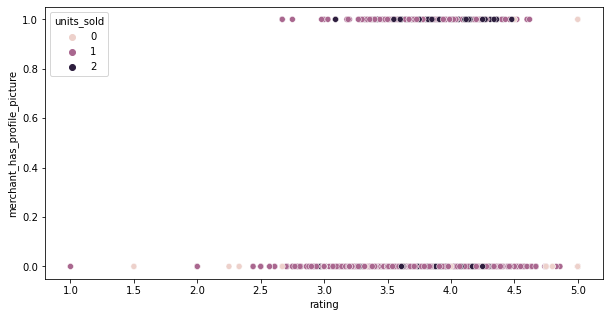

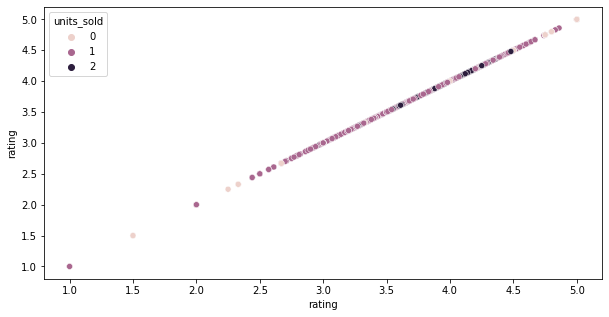

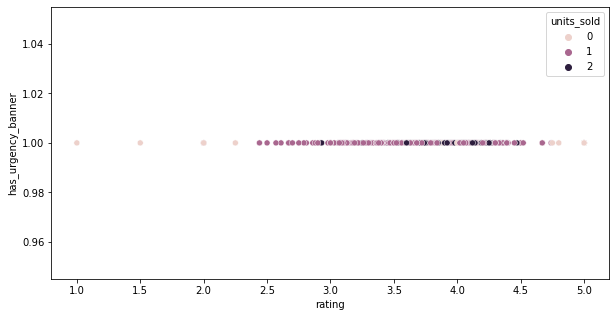

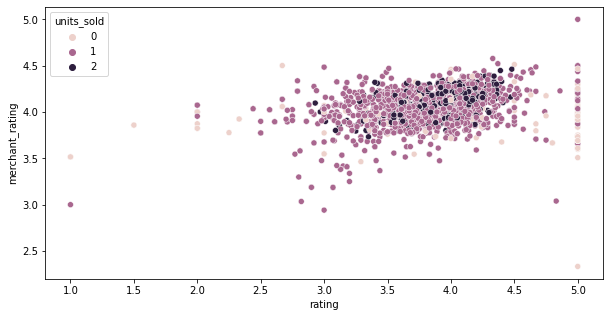

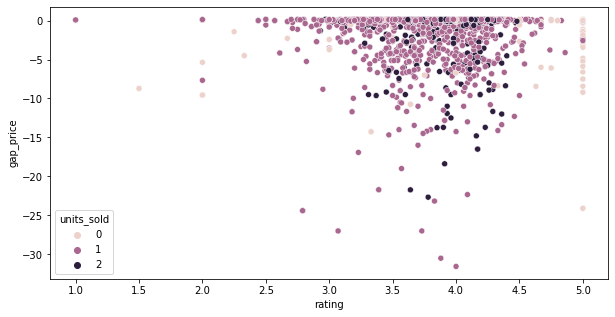

In [20]:
for i in numner_columns:
    fig,ax=plt.subplots(1,1,figsize=(10,5))
    sns.scatterplot(data=pro,x='rating',
               y=i,
                hue='units_sold'
               )

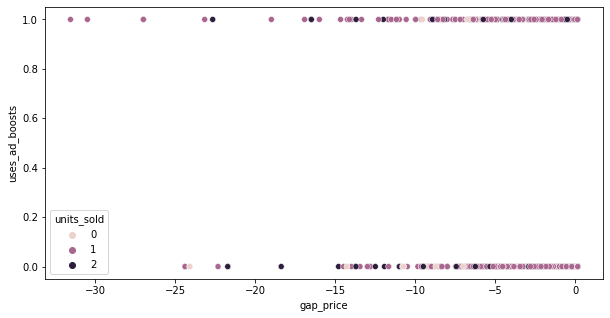

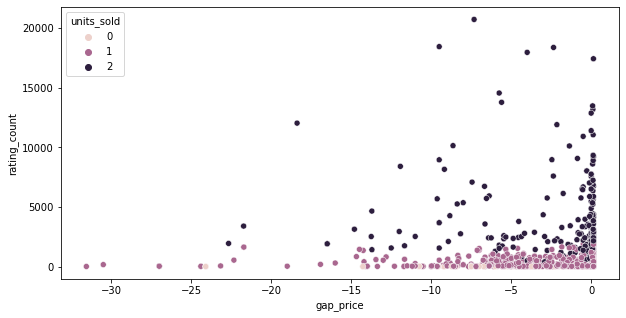

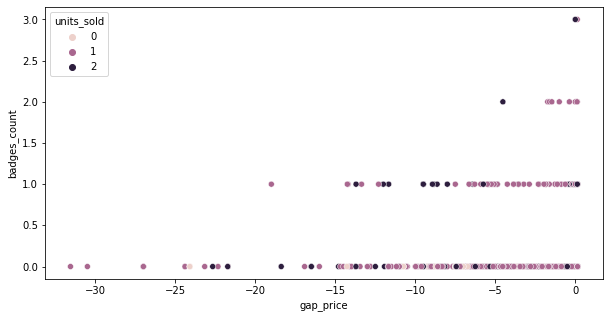

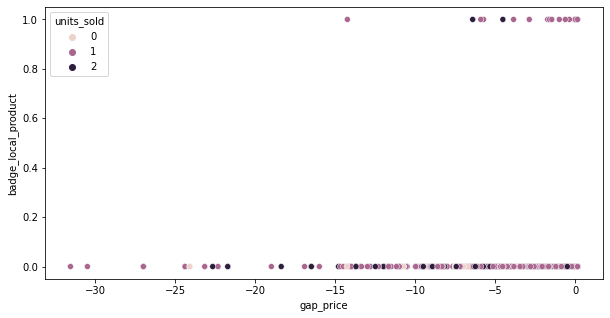

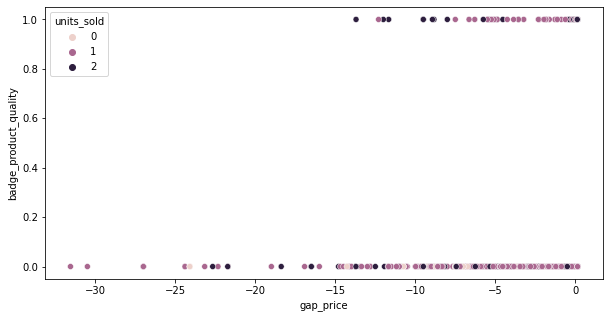

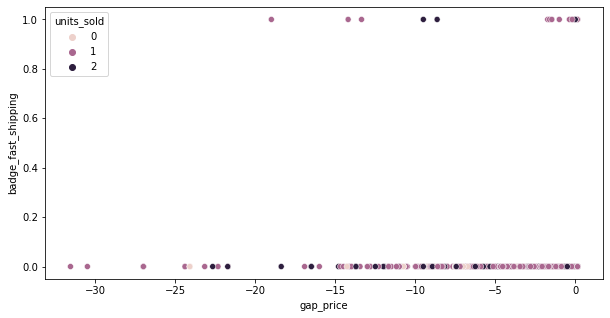

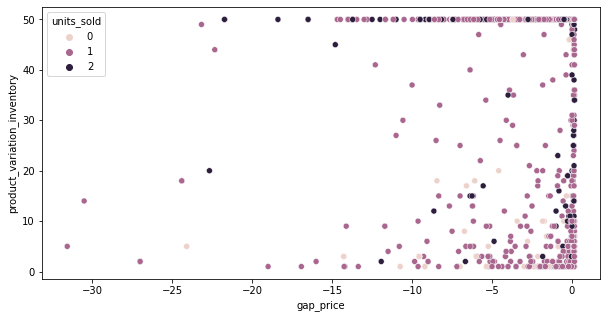

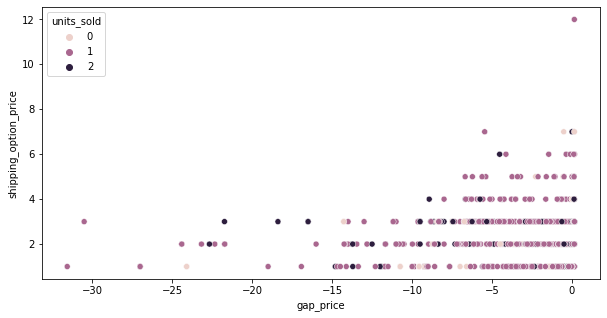

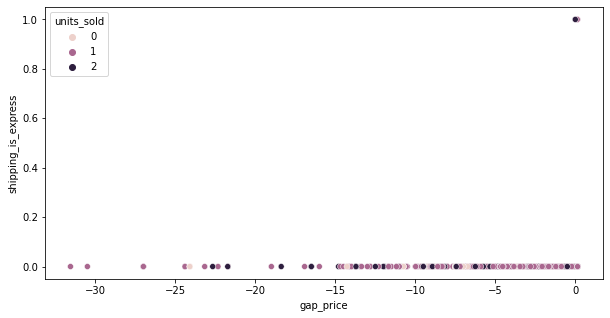

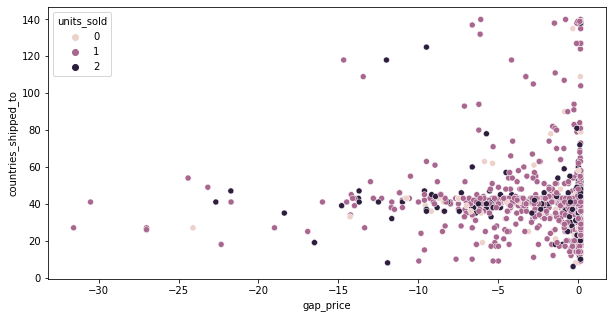

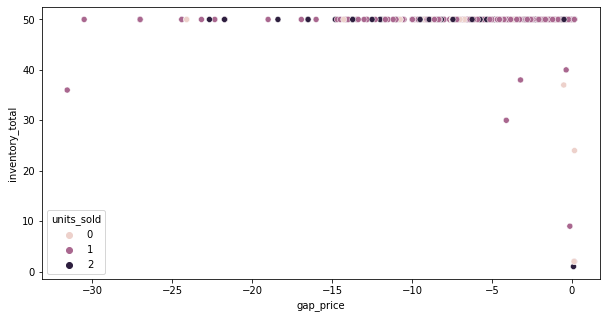

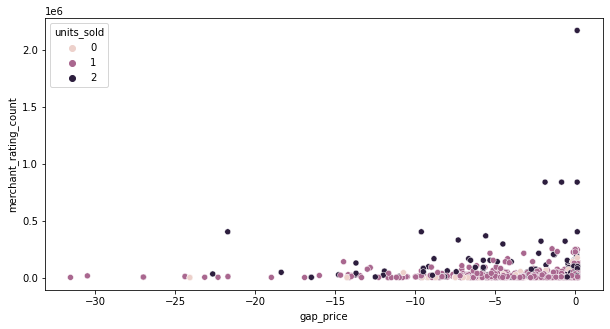

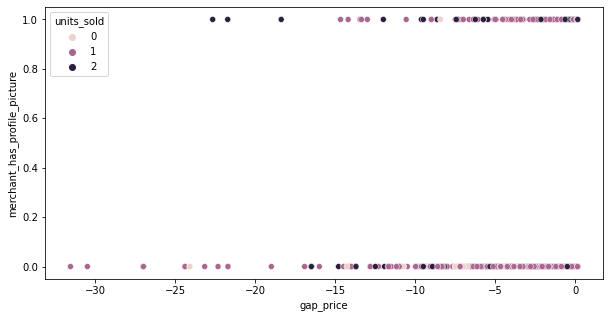

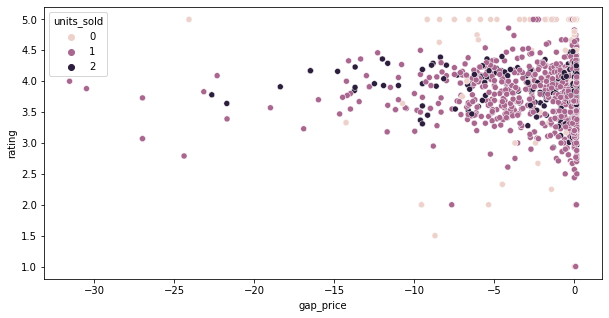

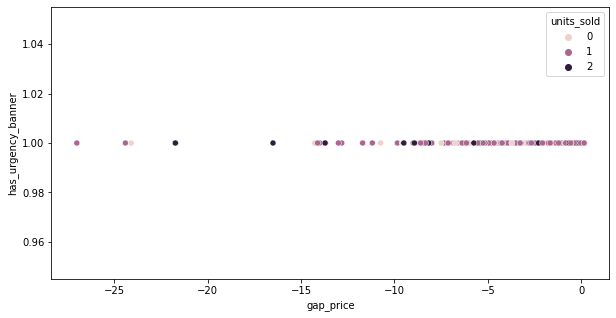

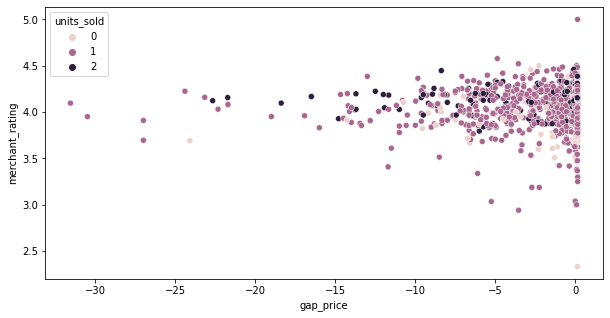

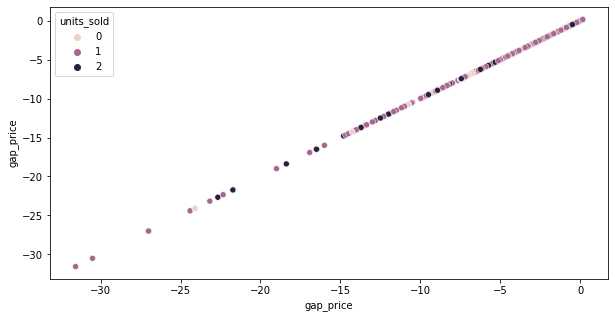

In [21]:
for i in numner_columns:
    fig,ax=plt.subplots(1,1,figsize=(10,5))
    sns.scatterplot(data=pro,x='gap_price',
               y=i,
                hue='units_sold'
               )

In the above visualization data, we found that the smaller the gap_price, the higher the rate and the higher the rate_count, the higher the sales volume.

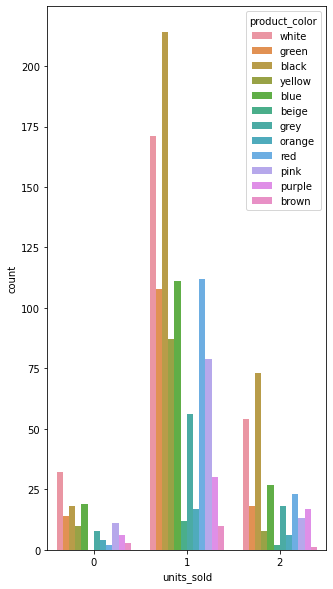

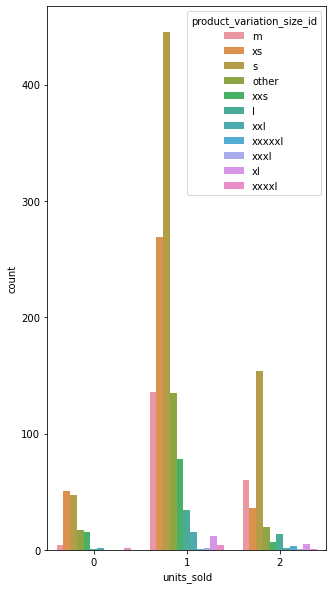

C:\Users\ubjd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ubjd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ubjd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ubjd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3626 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ubjd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ubjd\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 3591 missing from current font.

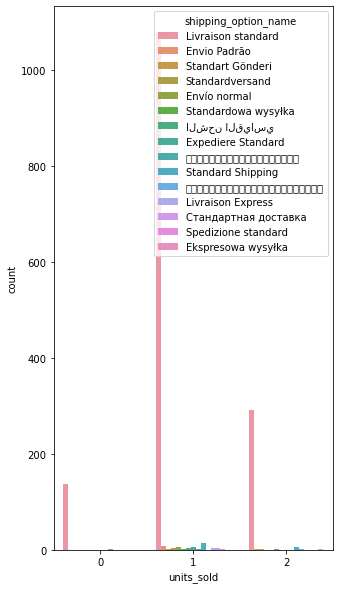

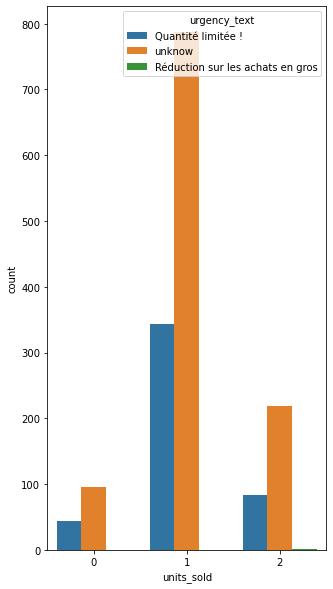

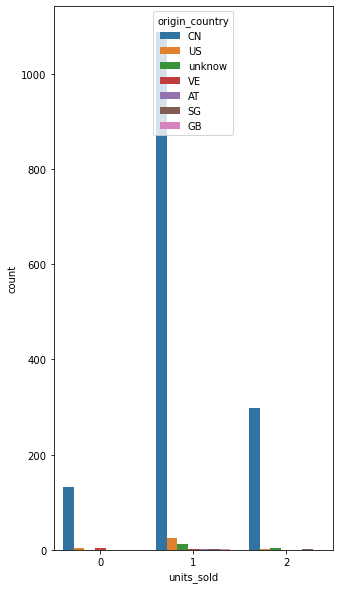

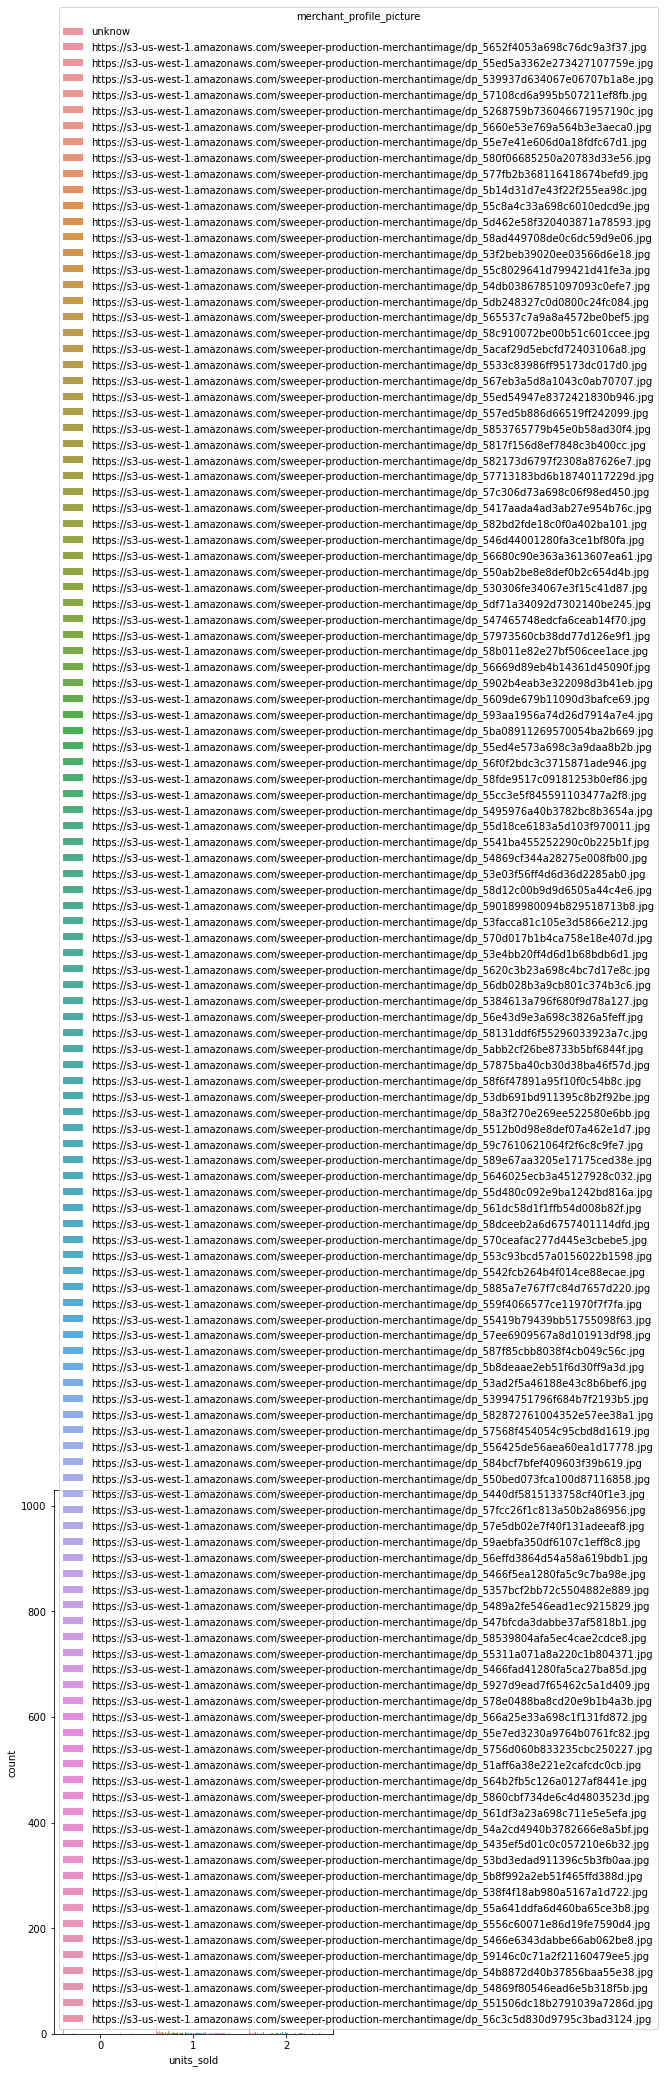

In [22]:
for i in cate_column:
    fig,ax=plt.subplots(1,1,figsize=(5,10))
    sns.countplot(x='units_sold',data=pro,hue=i)

and in the above histogram data, we found that s size and black color is universal taste in eu.

<AxesSubplot:>

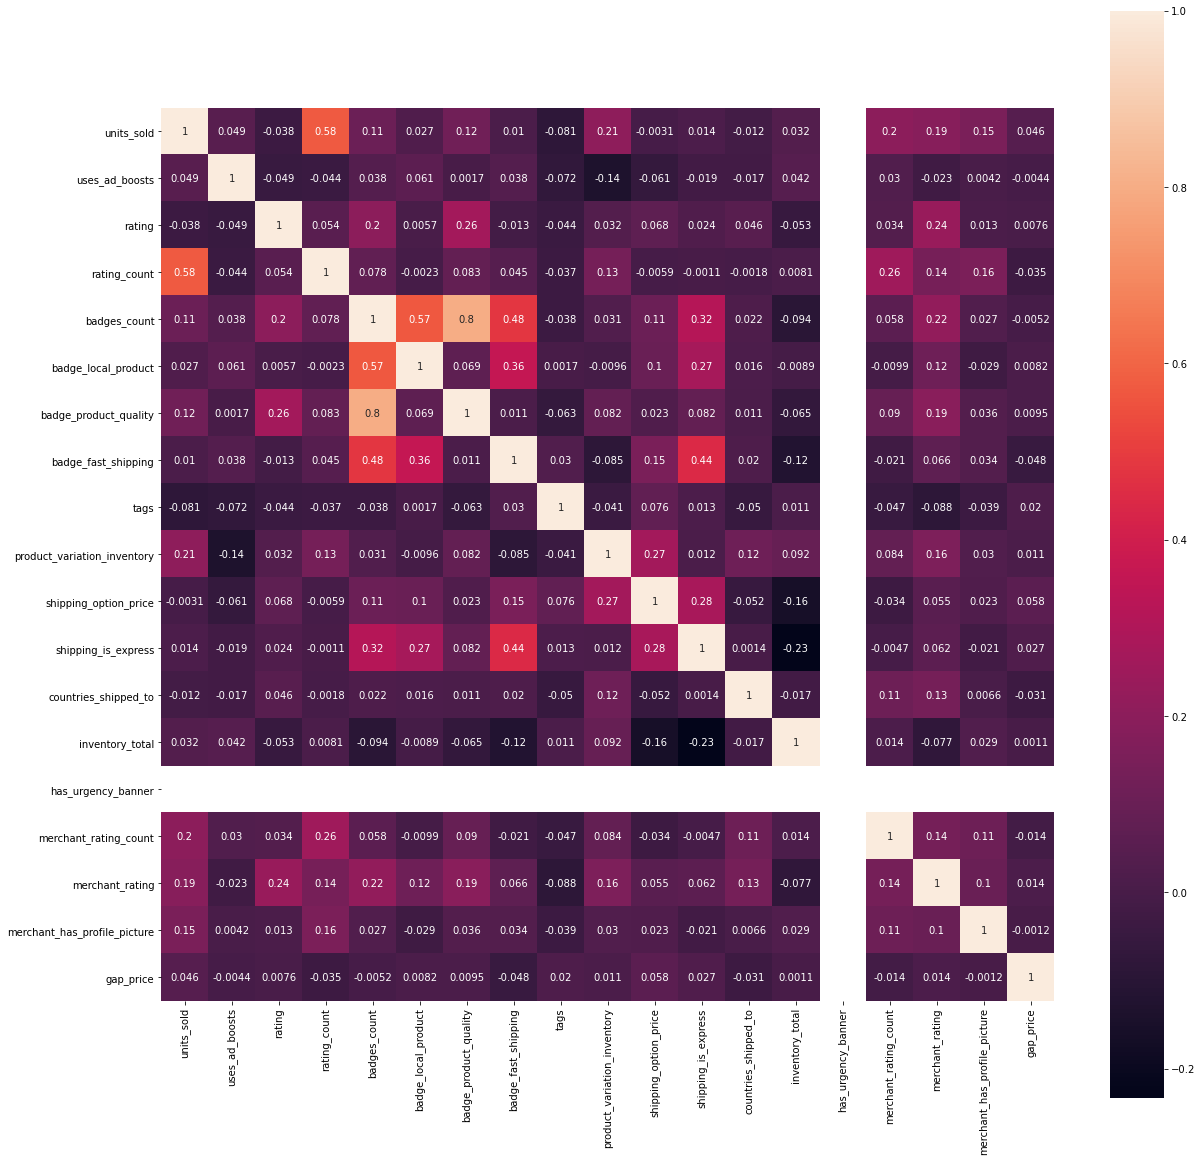

In [23]:
#pro=pro.drop(['shipping_option_name','origin_country'],axis=1)
fig,ax=plt.subplots(1,1,figsize=(20,20))
sns.heatmap(data=pro.corr(),annot=True,square=True)

this heatmap say us that except some columns,between other column and the other columns is independent.

To avoid curse of dimensionality, eliminate features that have a high correlation.

In [24]:
pro=pro.drop('badges_count',axis=1)

In [25]:
pro=pro.drop(['merchant_has_profile_picture', 'merchant_profile_picture'],axis=1)

In [26]:
pro['has_urgency_banner']=pro['has_urgency_banner'].fillna(0)

pro['product_color']=pro['product_color'].fillna(0)

In [27]:
C=(pro.dtypes=='object')
b=(pro.dtypes== 'bool')
Cate=list(C[C].index)
boolen=list(b[b].index)

t=pd.get_dummies(pro[Cate])
boo=pd.get_dummies(pro[boolen])

pro=pd.concat([pro,t],axis=1)
pro=pro.drop(Cate,axis=1)
pro=pd.concat([pro,boo],axis=1)
pro=pro.drop(boo,axis=1)

In [28]:
print(pro.columns)

Index(['units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating',
       'gap_price', 'product_color_0', 'product_color_beige',
       'product_color_black', 'product_color_blue', 'product_color_brown',
       'product_color_green', 'product_color_grey', 'product_color_orange',
       'product_color_pink', 'product_color_purple', 'product_color_red',
       'product_color_white', 'product_color_yellow',
       'product_variation_size_id_l', 'product_variation_size_id_m',
       'product_variation_size_id_other', 'product_variation_size_id_s',
       'product_variation_size_id_xl', 'product_variation_size_id_xs',
       'product_variation_size_id_xxl', 'product_variation_size_id_xxs',
       'product_varia

we make model which is logitstic

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [30]:
print(pro.isnull().sum())

units_sold               0
uses_ad_boosts           0
rating                   0
rating_count             0
badge_local_product      0
                        ..
origin_country_GB        0
origin_country_SG        0
origin_country_US        0
origin_country_VE        0
origin_country_unknow    0
Length: 65, dtype: int64


In [31]:
logit=LogisticRegression(penalty='l2',multi_class='multinomial')
y=pro['units_sold']
x=pro.drop('units_sold',axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.4)

In [32]:
stand=StandardScaler()
X_train=stand.fit_transform(X_train)
X_test=stand.transform(X_test)

In [33]:
y_score = logit.fit(X_train, y_train).predict_proba(X_test)
y_pred=logit.predict(X_test)
con1=pd.DataFrame(data=confusion_matrix(y_test,y_pred),index=['True[0]','True[1]','True[2]'],
columns=['Predict[0]','predict[1]','predict[2]'])
print(con1)
print(classification_report(y_test,y_pred))

         Predict[0]  predict[1]  predict[2]
True[0]          12          77           0
True[1]          10         651          11
True[2]           0          50         133
              precision    recall  f1-score   support

           0       0.55      0.13      0.22        89
           1       0.84      0.97      0.90       672
           2       0.92      0.73      0.81       183

    accuracy                           0.84       944
   macro avg       0.77      0.61      0.64       944
weighted avg       0.83      0.84      0.82       944



In [34]:
fpr={}
tpr={}
roc_auc={}
for i in range(3):
    fpr[i],tpr[i],_=roc_curve(y_test,y_score[:,i],pos_label=2)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

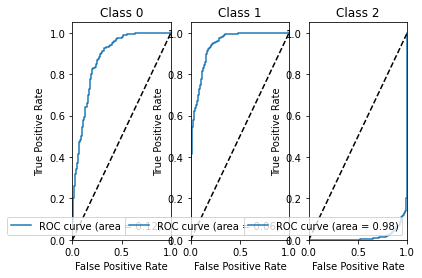

In [35]:
for idx, i in enumerate(range(3)):
    plt.subplot(131+idx)
    plt.plot(tpr[i], fpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
repeat=StratifiedKFold(n_splits=6,shuffle=True)
cross=cross_validate(estimator=logit,X=X_train,y=y_train,cv=repeat)

In [37]:
print(cross['test_score'].mean())

0.8600579975579975


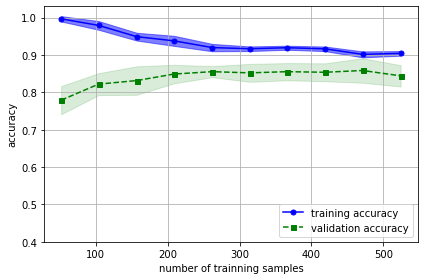

11

In [38]:
train_sizes,train_scores,test_scores=\
    learning_curve(estimator=logit,#수정
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1,1.0,10),
    cv=repeat)
#print(X_train)
#print(y_train)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,
color='blue',marker='o',
markersize=5,label='training accuracy')

plt.fill_between(train_sizes,
train_mean+train_std,
train_mean-train_std,
alpha=0.5,color='blue')

plt.plot(train_sizes,test_mean,
color='green',linestyle='--',
marker='s',markersize=5,
label='validation accuracy')

plt.fill_between(train_sizes,
test_mean+test_std,
test_mean-test_std,
alpha=0.15,color='green')

plt.grid()
plt.xlabel('number of trainning samples')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4,1.03])#수정  y값의 범위
plt.tight_layout()
plt.show()
11

Overfit and underfit problems were not seen through the learning curve. 